# Lets predict the price using FACEBOOK PROPHET

Here, we don't need to think about the dataset's stationarity or seasonality. The model is smart enough to predict the values of its own.

The strategy, here, will be quite straight forward.
- We will make a train test split.
- Will train our model accordingly.
- Will test it for RMSE and R-Squared Error.

#### Step 0: Import Necessary Packages

In [201]:
from tabulate import tabulate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from prophet import Prophet

#### Step 1: Prepare Dataset

Import dataset

In [202]:
df = pd.read_csv('../data/dal_final.csv')
df.head()

,Date,Close,Volume
0,2007-06-01,16.945208,2299400.0
1,2007-06-04,16.329809,5692700.0
2,2007-06-05,16.425148,4510000.0
3,2007-06-06,16.407816,2595300.0
4,2007-06-07,16.017773,3062100.0


Impose naming convention of Prophet

In [203]:
df = df.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
df.head()

,index,ds,y,Volume
0,0,2007-06-01,16.945208,2299400.0
1,1,2007-06-04,16.329809,5692700.0
2,2,2007-06-05,16.425148,4510000.0
3,3,2007-06-06,16.407816,2595300.0
4,4,2007-06-07,16.017773,3062100.0


Create a train test split

In [204]:
train_test_split_pct    = 0.8 # 80% train and 20% test
break_point             = int(0.8*df.shape[0])
train_df                = df[:break_point]
test_df                 = df[break_point:]
df_rows                 = df.shape[0]
train_df_rows           = train_df.shape[0]
test_df_rows            = test_df.shape[0]
equality_check          = "pass" if train_df_rows + test_df_rows == df_rows else "fail"
print(tabulate([{
    "df_rows": df_rows,
    "train_df_rows": train_df_rows,
    "test_df_rows": test_df_rows,
    "equality_check": equality_check 
}], headers="keys", tablefmt="pretty"))

+---------+---------------+--------------+----------------+
| df_rows | train_df_rows | test_df_rows | equality_check |
+---------+---------------+--------------+----------------+
|  4280   |     3424      |     856      |      pass      |
+---------+---------------+--------------+----------------+


In [205]:
train_df.head(1)

,index,ds,y,Volume
0,0,2007-06-01,16.945208,2299400.0


In [206]:
test_df.head(1)

,index,ds,y,Volume
3424,3424,2021-01-06,39.403313,12881100.0


#### Training the model

In [207]:
model = Prophet(changepoint_prior_scale=0.005)
model.fit(train_df)

18:20:16 - cmdstanpy - INFO - Chain [1] start processing
18:20:17 - cmdstanpy - INFO - Chain [1] done processing


In [208]:
future = pd.DataFrame({'ds': test_df['ds']})
future.shape

(856, 1)

In [209]:
forecast = model.predict(future)

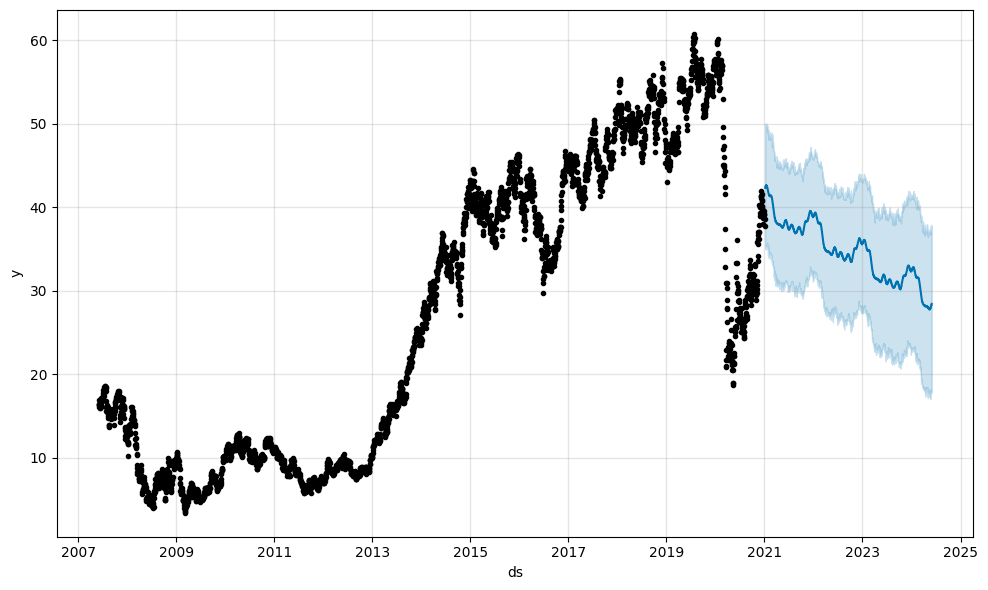

In [210]:
model.plot(forecast)
plt.show()

In [211]:
rmse = np.sqrt(mean_squared_error(test_df['y'], forecast['yhat']))
print(rmse)

7.5786148738606345


The RMSE number is quite high. The model is not that much recommended.

In [212]:
r_squared = r2_score(test_df['y'], forecast['yhat'])
print(r_squared)

-0.9731599094897199


This number is also bad due to the fact that if we take an absolute of the figure it is near 1.